# The code presented here generates figures from the manuscript "Mechanisms underlying growth inhibition of a denitrifier by reduced sulfur compounds"

* The code here focuses on the generation of figures displaying growth phenotypes (e.g., growth curves and substrate concentrations)
* See other notebooks for Transcriptomics or metabolomics analyses (each is represented by a seperate notebook)
* If running on windows, may need to change "/" to "\\" in the data import statements where the path to the data folder is specified. Should work fine on MacOS and Linux.
* Be sure no errors are encountered when importing the packaged needed below. If any are missing they can be installed here or on the command line using pip install package_name or conda install package_name if you are using Anaconda

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
%matplotlib inline

sns.set(context='talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42,'ps.fonttype':42},palette='colorblind')

# Figure 1 B:  I. calvum growth phenotype in nitrate reducing conditions

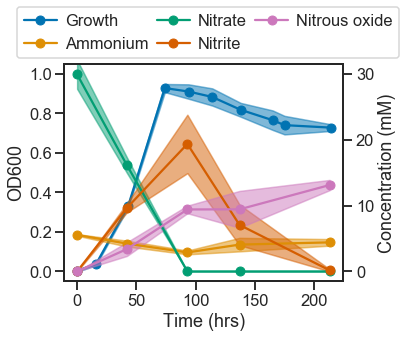

In [6]:
sns.set(context= 'talk',style='ticks',rc ={'axes.spines.right': True,'axes.spines.top': True},font_scale=1,palette='colorblind')

growthdata = pd.read_csv(r'data/Fig5-Growth.csv',index_col=[0,1],header=[0])
growthdata.columns=[pd.to_datetime(x) for x in growthdata.columns]
galdata=pd.read_csv(r'data/Fig5-Gallery.csv')
t0=galdata[(galdata.Treatment=='None')]
gcdata=pd.read_csv(r'data/Fig5-GC.csv')

c=sns.color_palette('colorblind')
i=0
handles=[]
lines=[]

mean=growthdata.loc['No treatment'].mean(axis=0)
std=growthdata.loc['No treatment'].std(axis=0)
fig,ax1 = plt.subplots(1,1,figsize=(5,4))
y=mean.values
yerr=std.values
x=mean.index.values
x = x-x[0]
x = x.astype('timedelta64[h]').astype('float')
x=x[:-3]
y=y[:-3]
yerr=yerr[:-3]
line,=ax1.plot(x,y,marker='o',color=c[i],label='Growth')
lines.append(line)
handles.append('Growth')
ax1.fill_between(x,y-yerr,y+yerr,alpha=0.5,label='Growth',color=c[i])
i+=1
ax2=ax1.twinx()
gal=galdata[(galdata.Treatment=='Reg')&(galdata.Supplement=='None')]
for index,df in gal.groupby(by='Measurement'):
    if index =='TON':
        continue
    mean=df.groupby(by='Timepoint').mean()
    t=mean['Hours'].values
    t=np.insert(t,0,0)
    mean=mean['Concentration (mM)'].values
    std=df.groupby(by='Timepoint').std()['Concentration (mM)'].values
    mean=np.insert(mean,0,t0[t0.Measurement==index].mean()['Concentration (mM)'])
    std=np.insert(std,0,t0[t0.Measurement==index].std()['Concentration (mM)'])
    line,=ax2.plot(t,mean,marker='o',color=c[i],label=index)
    lines.append(line)
    handles.append(index)
    ax2.fill_between(t,mean-std,mean+std,color=c[i],alpha=0.5)
    i+=1
n2o_mean=gcdata[(gcdata.cond=='Reg')&(gcdata.supp=='None')].groupby(by='time').mean()['mm'].values
n2o_std=gcdata[(gcdata.cond=='Reg')&(gcdata.supp=='None')].groupby(by='time').std()['mm'].values
n2o_mean=np.insert(n2o_mean,0,0)
n2o_std=np.insert(n2o_std,0,0)
line,=ax2.plot(t,n2o_mean,marker='o',color=c[i],label='Nitrous oxide')
ax2.fill_between(t,n2o_mean-n2o_std,n2o_mean+n2o_std,color=c[i],alpha=0.5)
lines.append(line)
handles.append('Nitrous oxide')
ax1.set_ylabel('OD600')
ax2.set_ylabel('Concentration (mM)')
ax1.set_xlabel('Time (hrs)')
ax1.set_ylim(-.05,1.05)
ax2.set_ylim(-1.5,31.5)
ax2.legend(lines,handles,bbox_to_anchor=(-.2,1.3),loc=2,ncol=3,columnspacing=0.5,labelspacing=.5,handletextpad=0.5)
#plt.savefig('081320-IC-Growth-Met.pdf',bbox_inches='tight')

# Figure 1 E: Transcriptomics growth curves  

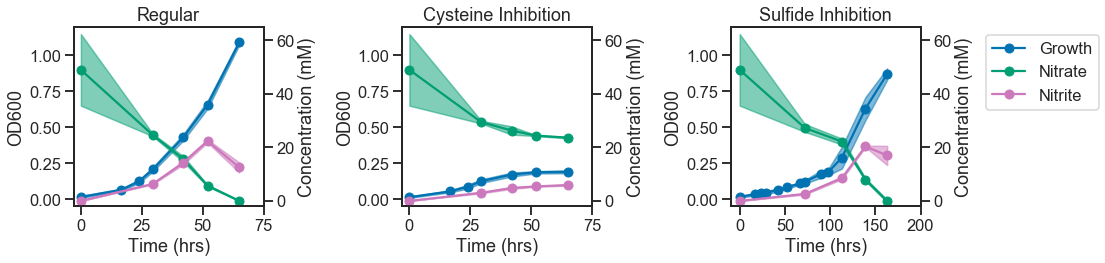

In [7]:
growthdata = pd.read_csv(r'data/Fig1E-Growth.csv',header=[0],index_col=[0,1,2])
growthdata.columns=growthdata.columns.astype(float)
growthdata=growthdata.sort_index(axis=1)
galdata = pd.read_csv(r'data/Fig1E-Gallery.csv',index_col=[0,1],header=[0])

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.set(context= 'talk',style='ticks',rc ={'axes.spines.right': True,'axes.spines.top': True},font_scale=1,palette='colorblind')
i = 0
handles= []
colors=sns.color_palette('colorblind')
for index,df in growthdata.sort_index(axis=1).groupby(level=[0]):
    if 'at mid-exp' in index:
        continue
    y= df.mean().dropna()
    x = y.index.values
    y=y.values
    err = df.std().dropna().values
    i=0
    if 'Regular' in index:
        index = 'Regular'
        ax1.plot(x,y,marker='o',label=index,color=colors[i])
        ax1.fill_between(x,y+err,y-err,alpha=0.5,color=colors[i])
    elif 'cys' in index:
        index = 'Cysteine inhibition'
        ax2.plot(x,y,marker='o',label=index,color=colors[i])
        ax2.fill_between(x,y+err,y-err,alpha=0.5,color=colors[i])
    elif 'sulf' in index:
        index = 'Sulfide inhibition'
        line, = ax3.plot(x,y,marker='o',label='Growth',color=colors[i])
        handles.append(line)
        ax3.fill_between(x,y+err,y-err,alpha=0.5,color=colors[i])
#plt.legend(bbox_to_anchor=(1,1))


means = galdata.groupby(level=[0,1]).mean()
err = galdata.groupby(level=[0,1]).std()
i=0
ax4 =ax1.twinx()
ax5 =ax2.twinx()
ax6 =ax3.twinx()
labels={'Cys':'Cysteine Inhibition','Sulf':'Sulfide Inhibition','Reg':'Regular'}
for cond in['Reg','Cys','Sulf']:
    if cond == 'Reg':
        i=2
        ax4.plot(means.loc[cond,'Time'],means.loc[cond,'Nitrate'],marker='o',label=labels[cond],color=colors[i])
        ax4.fill_between(means.loc[cond,'Time'],means.loc[cond,'Nitrate']-err.loc[cond,'Nitrate'],means.loc[cond,'Nitrate']+err.loc[cond,'Nitrate'],alpha=0.5,color=colors[i])
        i=4
        ax4.plot(means.loc[cond,'Time'],means.loc[cond,'Nitrite'],marker='o',label=labels[cond],color=colors[i])
        ax4.fill_between(means.loc[cond,'Time'],means.loc[cond,'Nitrite']-err.loc[cond,'Nitrite'],means.loc[cond,'Nitrite']+err.loc[cond,'Nitrite'],alpha=0.5,color=colors[i])
    elif cond == 'Cys':
        i=2
        ax5.plot(means.loc[cond,'Time'],means.loc[cond,'Nitrate'],marker='o',label=labels[cond],color=colors[i])
        ax5.fill_between(means.loc[cond,'Time'],means.loc[cond,'Nitrate']-err.loc[cond,'Nitrate'],means.loc[cond,'Nitrate']+err.loc[cond,'Nitrate'],alpha=0.5,color=colors[i])
        i=4
        ax5.plot(means.loc[cond,'Time'],means.loc[cond,'Nitrite'],marker='o',label=labels[cond],color=colors[i])
        ax5.fill_between(means.loc[cond,'Time'],means.loc[cond,'Nitrite']-err.loc[cond,'Nitrite'],means.loc[cond,'Nitrite']+err.loc[cond,'Nitrite'],alpha=0.5,color=colors[i])
    else:
        i=2
        line,=ax6.plot(means.loc[cond,'Time'],means.loc[cond,'Nitrate'],marker='o',label='Nitrate',color=colors[i])
        handles.append(line)
        ax6.fill_between(means.loc[cond,'Time'],means.loc[cond,'Nitrate']-err.loc[cond,'Nitrate'],means.loc[cond,'Nitrate']+err.loc[cond,'Nitrate'],alpha=0.5,color=colors[i])
        i=4
        line,=ax6.plot(means.loc[cond,'Time'],means.loc[cond,'Nitrite'],marker='o',label='Nitrite',color=colors[i])
        handles.append(line)
        ax6.fill_between(means.loc[cond,'Time'],means.loc[cond,'Nitrite']-err.loc[cond,'Nitrite'],means.loc[cond,'Nitrite']+err.loc[cond,'Nitrite'],alpha=0.5,color=colors[i])
    i+=2
ax1.set_xlabel('Time (hrs)')
ax2.set_xlabel('Time (hrs)')
ax3.set_xlabel('Time (hrs)')
ax1.set_title('Regular')
ax2.set_title('Cysteine Inhibition')
ax3.set_title('Sulfide Inhibition')
ax1.set_ylabel('OD600')
ax2.set_ylabel('OD600')
ax3.set_ylabel('OD600')
ax4.set_ylabel('Concentration (mM)')
ax5.set_ylabel('Concentration (mM)')
ax6.set_ylabel('Concentration (mM)')

ax1.set_ylim(-.05,1.2)
ax2.set_ylim(-.05,1.2)
ax3.set_ylim(-.05,1.2)
ax4.set_ylim(-2,65)
ax5.set_ylim(-2,65)
ax6.set_ylim(-2,65)
ax1.set_xticks([0,25,50,75])
ax2.set_xticks([0,25,50,75])
ax3.set_xticks([0,50,100,150,200])
ax1.set_xlim(-3,75)
ax2.set_xlim(-3,75)
ax3.set_xlim(-10,200)

ax3.legend(handles,['Growth','Nitrate','Nitrite'],bbox_to_anchor=(1.3,1),loc=2)
plt.tight_layout()
#plt.savefig('Fig1E.pdf',bbox_inches='tight')

# Figure 1 C-D: Dose dependent effects of cysteine and sulfide

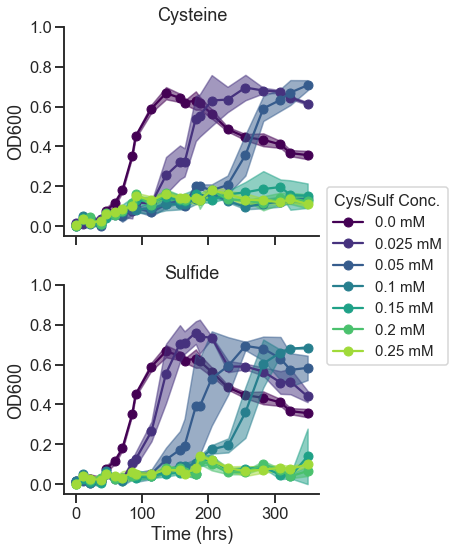

In [8]:
sns.set(context='talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42,'ps.fonttype':42},palette='colorblind')
data = pd.read_csv(r'data/Fig1CD.csv',index_col=[0,1],header=[0])
data.columns=[pd.to_datetime(x) for x in data.columns]
i = 1
j = 1
K=7
colors = plt.cm.viridis
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(5,8),sharey=True,sharex=True)
for index,df in data.sort_index(axis=1).groupby(level=[0]):

    df = df.dropna(axis=1)
    y= df.mean().values
    x = df.columns.values
    x = x-x[0]
    x = x.astype('timedelta64[h]').astype('float')
    err = df.std().values
    if 'Cys' in index:
        ax1.plot(x,y,marker='o',label=index,color=colors(i/K))
        ax1.fill_between(x,y+err,y-err,alpha=0.5,color=colors(i/K))
        i+=1
    elif 'Sulf' in index:
        ax2.plot(x,y,marker='o',label=index,color=colors(j/K))
        ax2.fill_between(x,y+err,y-err,alpha=0.5,color=colors(j/K))
        j+=1
    else:
        label = '0.0 mM Cys'
        ax1.plot(x,y,marker='o',label=label,color=colors(0/K),zorder=0)
        ax1.fill_between(x,y+err,y-err,alpha=0.5,color=colors(0/K),zorder=0)
        
        label = '0.0 mM Sulf'
        ax2.plot(x,y,marker='o',label=label,color=colors(0/K),zorder=0)
        ax2.fill_between(x,y+err,y-err,alpha=0.5,color=colors(0/K),zorder=0)
ax1.set_title('Cysteine')
ax2.set_title('Sulfide')
ax2.set_xlabel('Time (hrs)')
ax1.set_ylabel('OD600')
ax2.set_ylabel('OD600')
ax1.set_ylim(-0.05,1)
plt.tight_layout()


handles, labels = ax2.get_legend_handles_labels()
h = handles.pop()
handles.insert(0,h)
l = labels.pop()
labels.insert(0,l)

leg = ax2.legend(handles,[x[:-5] for x in labels],bbox_to_anchor=(1,1.5),fontsize=15,title='Cys/Sulf Conc.')
leg.get_title().set_fontsize('16')
#plt.savefig('Fig1CD.pdf',bbox_inches='tight')

# Supplementation Experiment 
* Includes growth (OD600), nitrate, nitrite, ammonium (Gallery photometric analyzer), and nitrous oxide (GC) data
* Chemical concentrations are in mM units
* Calibration standard data and code used to convert measurement values to concentratons is not included but can be provided upon request
* The components of Figure 5 were generated as follows and assembled in Adobe Illustrator

# Figure 5 A growth data

(-0.05, 1.2)

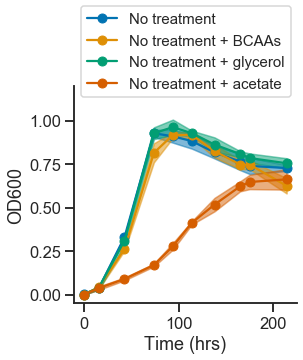

In [9]:
growthdata = pd.read_csv(r'data/Fig5-Growth.csv',index_col=[0,1],header=[0])
growthdata.columns=[pd.to_datetime(x) for x in growthdata.columns]

i = 0
fig,ax = plt.subplots(1,1,figsize=(4,4))
colors = sns.color_palette('colorblind')
for index in ['No treatment','No treatment + BCAAs','No treatment + glycerol','No treatment + acetate']:
    df = growthdata.loc[index,:]
    if i%4== 0 and i!=0:
        ax.set_xlabel('Time (hrs)')
        ax.set_ylabel('OD600')
        ax.set_ylim(-0.05,1.2)
        plt.legend(loc=2,bbox_to_anchor=(0,1.4),fontsize=15)
        fig,ax = plt.subplots(1,1,figsize=(4,4))
        
        #ax.set_xlim(-10,250)
    y= df.mean().values
    x = df.columns.values
    x = x-x[0]
    x = x.astype('timedelta64[h]').astype('float')
    x=x[:-3]
    y=y[:-3]
    err = df.std().values
    err = err[:-3]
    ax.plot(x,y,marker='o',label=index,color=colors[i])
    ax.fill_between(x,y+err,y-err,alpha=0.5,color=colors[i])
    i+=1
    #plt.title(index)
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('OD600')
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc=2,bbox_to_anchor=(0,1.4),fontsize=15)
ax.set_ylim(-0.05,1.2)
#plt.savefig('Fig5A-growth.pdf',bbox_inches='tight')

# Figure 5 B growth data

(-0.05, 1.2)

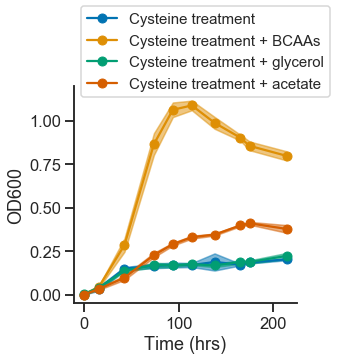

In [159]:
growthdata = pd.read_csv(r'data/Fig5-Growth.csv',index_col=[0,1],header=[0])
growthdata.columns=[pd.to_datetime(x) for x in growthdata.columns]

i = 0
fig,ax = plt.subplots(1,1,figsize=(4,4))
colors = sns.color_palette('colorblind')
for index in ['Cysteine treatment','Cysteine treatment + BCAAs','Cysteine treatment + glycerol','Cysteine treatment + acetate']:
    df = growthdata.loc[index,:]
    if i%4 == 0 and i!=0:
        ax.set_xlabel('Time (hrs)')
        ax.set_ylabel('OD600')
        ax.set_ylim(-0.05,1.2)
        plt.legend(loc=2,bbox_to_anchor=(0,1.4),fontsize=15)
        fig,ax = plt.subplots(1,1,figsize=(4,4))
        
        #ax.set_xlim(-10,250)
    y= df.mean().values
    x = df.columns.values
    x = x-x[0]
    x = x.astype('timedelta64[h]').astype('float')
    x=x[:-3]
    y=y[:-3]
    err = df.std().values
    err = err[:-3]
    ax.plot(x,y,marker='o',label=index,color=colors[i])
    ax.fill_between(x,y+err,y-err,alpha=0.5,color=colors[i])
    i+=1
    #plt.title(index)
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('OD600')
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc=2,bbox_to_anchor=(0,1.4),fontsize=15)
ax.set_ylim(-0.05,1.2)
#plt.savefig('Fig5B-growth.pdf',bbox_inches='tight')

# Figure 5 C growth data

(-0.05, 1.2)

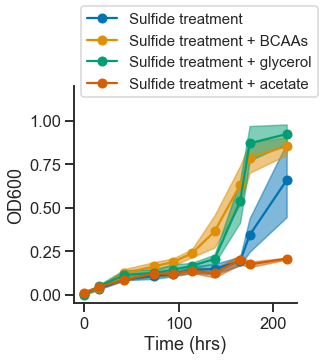

In [10]:
growthdata = pd.read_csv(r'data/Fig5-Growth.csv',index_col=[0,1],header=[0])
growthdata.columns=[pd.to_datetime(x) for x in growthdata.columns]
i = 0
fig,ax = plt.subplots(1,1,figsize=(4,4))
colors = sns.color_palette('colorblind')
for index in ['Sulfide treatment','Sulfide treatment + BCAAs','Sulfide treatment + glycerol','Sulfide treatment + acetate']:
    df = growthdata.loc[index,:]
    df=df.loc[df.mean(axis=1).dropna().index.values,:]
    if i%4== 0 and i!=0:
        ax.set_xlabel('Time (hrs)')
        ax.set_ylabel('OD600')
        ax.set_ylim(-0.05,1.2)
        plt.legend(loc=2,bbox_to_anchor=(0,1.4),fontsize=15)
        fig,ax = plt.subplots(1,1,figsize=(4,4))
        
        #ax.set_xlim(-10,250)
    y= df.mean().values
    x = df.columns.values
    x = x-x[0]
    x = x.astype('timedelta64[h]').astype('float')
    x=x[:-3]
    y=y[:-3]
    err = df.std().values
    err = err[:-3]
    ax.plot(x,y,marker='o',label=index,color=colors[i])
    ax.fill_between(x,y+err,y-err,alpha=0.5,color=colors[i])
    i+=1
    #plt.title(index)
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('OD600')
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc=2,bbox_to_anchor=(0,1.4),fontsize=15)
ax.set_ylim(-0.05,1.2)
#plt.savefig('Fig5C-growth.pdf',bbox_inches='tight')

# Figure 5 A-C N-Species

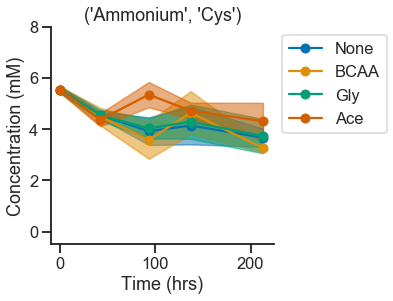

<Figure size 432x288 with 0 Axes>

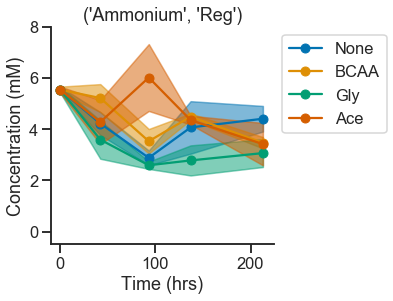

<Figure size 432x288 with 0 Axes>

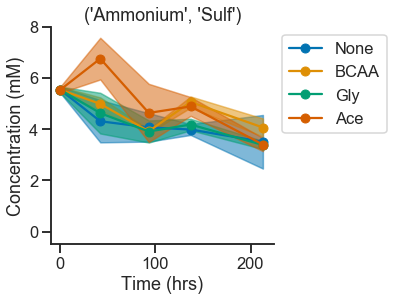

<Figure size 432x288 with 0 Axes>

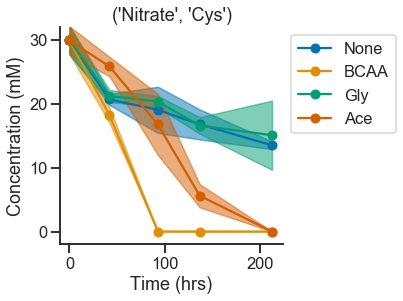

<Figure size 432x288 with 0 Axes>

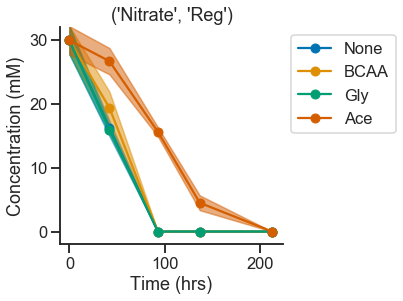

<Figure size 432x288 with 0 Axes>

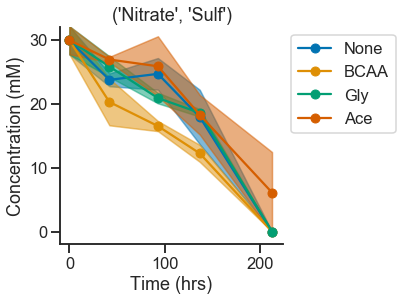

<Figure size 432x288 with 0 Axes>

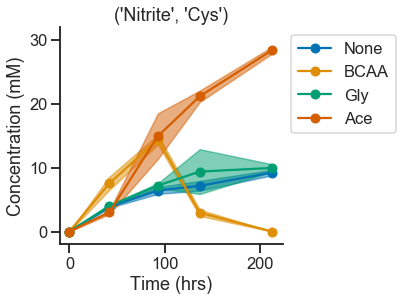

<Figure size 432x288 with 0 Axes>

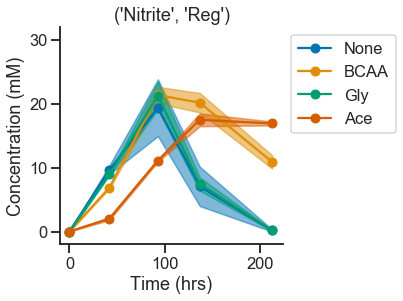

<Figure size 432x288 with 0 Axes>

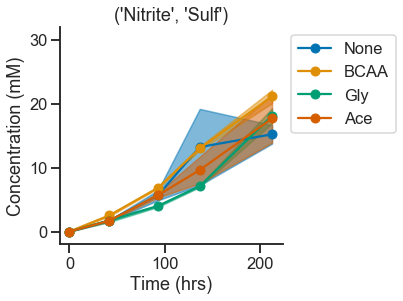

<Figure size 432x288 with 0 Axes>

In [11]:
galdata=pd.read_csv('data/Fig5-Gallery.csv')
t0=galdata[(galdata.Treatment=='None')]

c=sns.color_palette('colorblind')
labels={'Reg':'No treatment','Sulf':'Sulfide treatment','Cys':'Cysteine treatment'}

for idx,df in galdata.groupby(by=['Measurement','Treatment']):
    if 'TON' in idx[0] or idx[1] =='None':
        continue
    plt.figure(figsize=(4,4))
    plt.title(idx)
    i=0
    for idx2 in ['None','BCAA','Gly','Ace']:
        df2 = df[df.Supplement==idx2]
        mean=df2.groupby(by='Timepoint').mean()
        t=mean['Hours'].values
        t=np.insert(t,0,0)
        mean=mean['Concentration (mM)'].values
        std=df2.groupby(by='Timepoint').std()['Concentration (mM)'].values
        mean=np.insert(mean,0,t0[t0.Measurement==idx[0]].mean()['Concentration (mM)'])
        std=np.insert(std,0,t0[t0.Measurement==idx[0]].std()['Concentration (mM)'])
        plt.plot(t,mean,marker='o',color=c[i],label=idx2)
        plt.fill_between(t,mean-std,mean+std,color=c[i],alpha=0.5)
        i+=1
    if idx[0]=='Ammonium':
        plt.ylim(-.5,8)
    else:
        plt.ylim(-2,32)
    plt.xlabel('Time (hrs)')
    plt.ylabel('Concentration (mM)')
    plt.xlim(-10, 224.7)
    plt.legend(bbox_to_anchor=(1,1),loc=2)
    #plt.savefig('Fig5'+idx[0]+'-'+idx[1]+'.pdf',bbox_inches='tight')
    plt.show()
    plt.clf()

# Figure 5 A-C N2O
* Data provided included head space ppm estimated from linear fit of N2O standard peak area vs ppm 
* Data also included liquid concentration (mM) estimates obtained from linear fit of ppm vs liquid mM
* Liquid mM values were obtained using Henry's law (which provides a liner relationship between headspace ppm and liquid mM when other parameters are held constant)
* Additional information used to determin ppm and mM values can be provided upon request

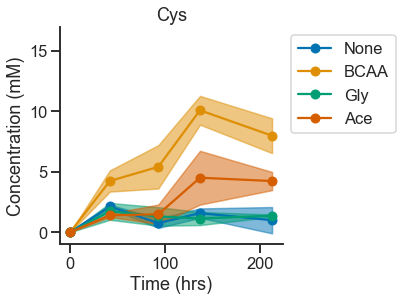

<Figure size 432x288 with 0 Axes>

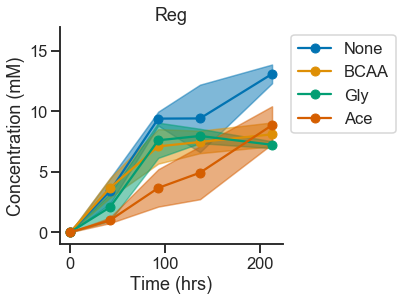

<Figure size 432x288 with 0 Axes>

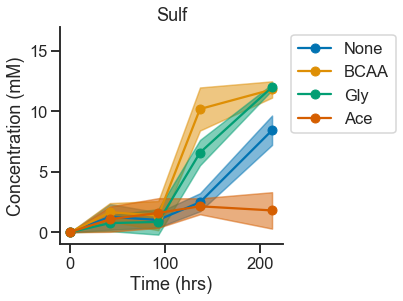

<Figure size 432x288 with 0 Axes>

In [12]:
gcdata=pd.read_csv(r'data/Fig5-GC.csv')

c=sns.color_palette('colorblind')
for idx,df in gcdata.groupby(by='cond'):
    plt.figure(figsize=(4,4))
    plt.title(idx)
    i=0
    for idx2 in ['None','BCAA','Gly','Ace']:
        df2 = df[df.supp==idx2]
        mean=df2.groupby(by='time')['mm'].mean().values.ravel()
        std=df2.groupby(by='time')['mm'].std().values.ravel()
        mean=np.insert(mean,0,0)
        std=np.insert(std,0,0)
        plt.plot(t,mean,marker='o',color=c[i],label=idx2)
        plt.fill_between(t,mean-std,mean+std,color=c[i],alpha=0.5)
        i+=1
    else:
        plt.ylim(-1,17)
    plt.xlabel('Time (hrs)')
    plt.ylabel('Concentration (mM)')
    plt.xlim(-10.700000000000001, 224.7)
    plt.legend(bbox_to_anchor=(1,1),loc=2)
    #plt.savefig('Fig5'+idx+'-'+'N2O'+'.pdf',bbox_inches='tight')
    plt.show()
    plt.clf()

# Supplementary Figure 1: Chemostat growth with varying C/N ratios

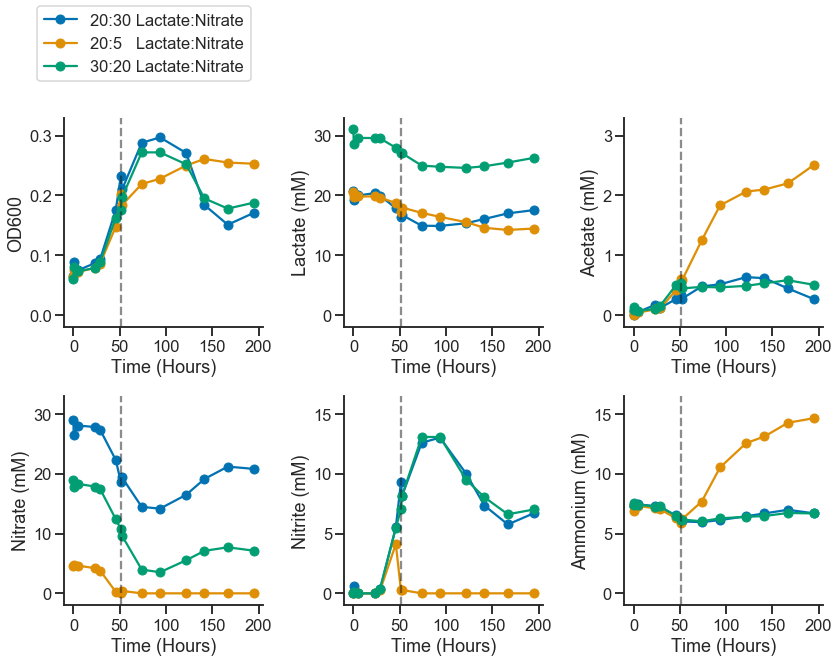

In [13]:
data=pd.read_csv(r'data/Supp-Fig1.csv')
data=data.fillna(0)
data=data[data.Reactor!='source']

fig,ax=plt.subplots(2,3,figsize=(12,8))

for index,df in data.groupby(by='Media'):
    if len(index.split()[0])<5:
        label=index.split()[0]+'   '+'Lactate:Nitrate'
    else:
        label=index.split()[0]+' '+'Lactate:Nitrate'
    i=0
    j=0
    for col in ['OD600','Lactate_mM','Acetate_mM','Nitrate_mM','Nitrite_mM','NH4_mM']:
        idx=df[['Hours',col]].dropna().index.values
        ax[j][i%3].plot(df.loc[idx,'Hours'],df.loc[idx,col],marker='o',label=label)
        if '_' in col:
            if 'NH4' in col:
                col='Ammonium_mM'
            ax[j][i%3].set_ylabel(col.split('_')[0]+' (mM)')
        else:
            ax[j][i%3].set_ylabel(col)
        ax[j][i%3].set_xlabel('Time (Hours)')
        i+=1
        if i%3==0 and i !=0:
            j+=1
i=0
ylims=[(-.02,.33),(-2,33),(-.2,3.3),(-2,33),(-1,16.5),(-1,16.5)]
for axis in ax.ravel():
    axis.plot((51,51),ylims[i],'k--',alpha=0.5)
    axis.set_ylim(ylims[i])
    axis.set_xticks([0,50,100,150,200])
    i+=1    
plt.tight_layout()
plt.legend(loc=2,bbox_to_anchor=(-3,2.9))
#plt.savefig('Supp-Fig1.pdf',bbox_inches='tight')

# Supplementary Figure 2: Aerobic vs Anearobic growth in the presence of cysteine and sulfide

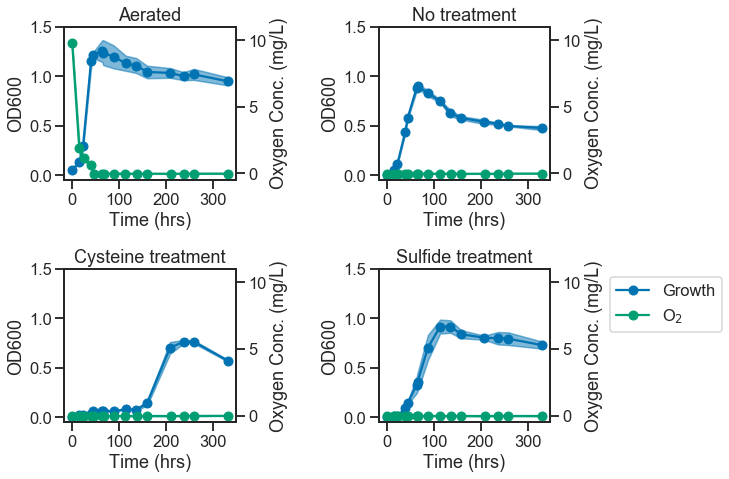

In [14]:
growth = pd.read_csv(r'data/Supp-Fig2-growth.csv',index_col=[0,1],header=[0])
oxy = pd.read_csv(r'data/Supp-Fig2-oxy.csv',index_col=[0,1],header=[0])

growth.columns =[pd.to_datetime(x) for x in growth.columns]
oxy.columns =[pd.to_datetime(x) for x in oxy.columns]

sns.set(context= 'talk',style='ticks',rc ={'axes.spines.right': True,'axes.spines.top': True},font_scale=1,palette='colorblind')
c=sns.color_palette('colorblind')
titles={'Reg':'No treatment','Sulf':'Sulfide treatment','Cys':'Cysteine treatment','Aero':'Aerated'}
fig,ax = plt.subplots(2,2,figsize=(9,7))
i=0
j=0
for index,df in growth.sort_index(axis=1).groupby(level=[0]):
    if index not in titles:
        continue
    if i!=0 and i%2 ==0:
        j=1
    ax1=ax[i%2][j]

    y= df.mean().values
    x = df.columns.values
    x = x-x[0]
    x = x.astype('timedelta64[h]').astype('float')
    err = df.std().values
    l1, = ax1.plot(x,y,marker='o',label='Growth',color=c[0])
    ax1.fill_between(x,y+err,y-err,alpha=0.5,color=c[0])
    
    ax2=ax1.twinx()
    y= oxy.loc[index,:].mean().values
    x = oxy.loc[index,:].columns.values
    x = x-x[0]
    x = x.astype('timedelta64[h]').astype('float')
    err = oxy.loc[index,:].std().values
    l2, = ax2.plot(x,y,marker='o',label='O$_2$',color=c[2])
    ax2.fill_between(x,y+err,y-err,alpha=0.5,color=c[2])
    ax2.set_title(titles[index])
    
    ax1.set_xlabel('Time (hrs)')
    ax2.set_ylabel('Oxygen Conc. (mg/L)')
    ax1.set_ylabel('OD600')
    ax2.set_ylim(-.5,11)
    ax1.set_ylim(-0.05,1.4)
    ax1.set_xticks([0,100,200,300])
    ax1.set_yticks([0,.5,1,1.5])
    i+=1
plt.tight_layout()
ax2.legend([l1,l2],['Growth','O$_2$'],bbox_to_anchor=(1.3,1),loc=2)
#plt.savefig('Supp-Fig2.pdf',bbox_inches='tight')